In [36]:
def fn_plot_decision_boundary(pred_func, X, y, ax = None):
    '''
        Attrib:
           pred_func : function based on predict method of 
                    the classifier
           X : feature matrix
           y : targets
       Return:
           None
    '''
    if ax is None:
        ax = plt.gca()
        
    # Set min and max values and give it some padding
    xMin, xMax = X[:, 0].min() - .05, X[:, 0].max() + .05
    yMin, yMax = X[:, 1].min() - .05, X[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.05
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = pred_func.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=CMAP, alpha = 0.6)
    
    # plot the points as well
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=CMAP, edgecolors='black')

In [37]:

import sys
import os
from time import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm  

In [38]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join('Input')

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

<Figure size 1500x500 with 0 Axes>

In [39]:
iris_file = os.path.join('iris.csv')

iris_feature = [
    'sepal lenght' ,  'sepal width' , 'petal lenght' , 'petal width' , 'target'
]
iris_df = pd.read_csv(iris_file , sep=',' , skiprows=1 , header=None , names=iris_feature)

iris_df.head()

,sepal lenght,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


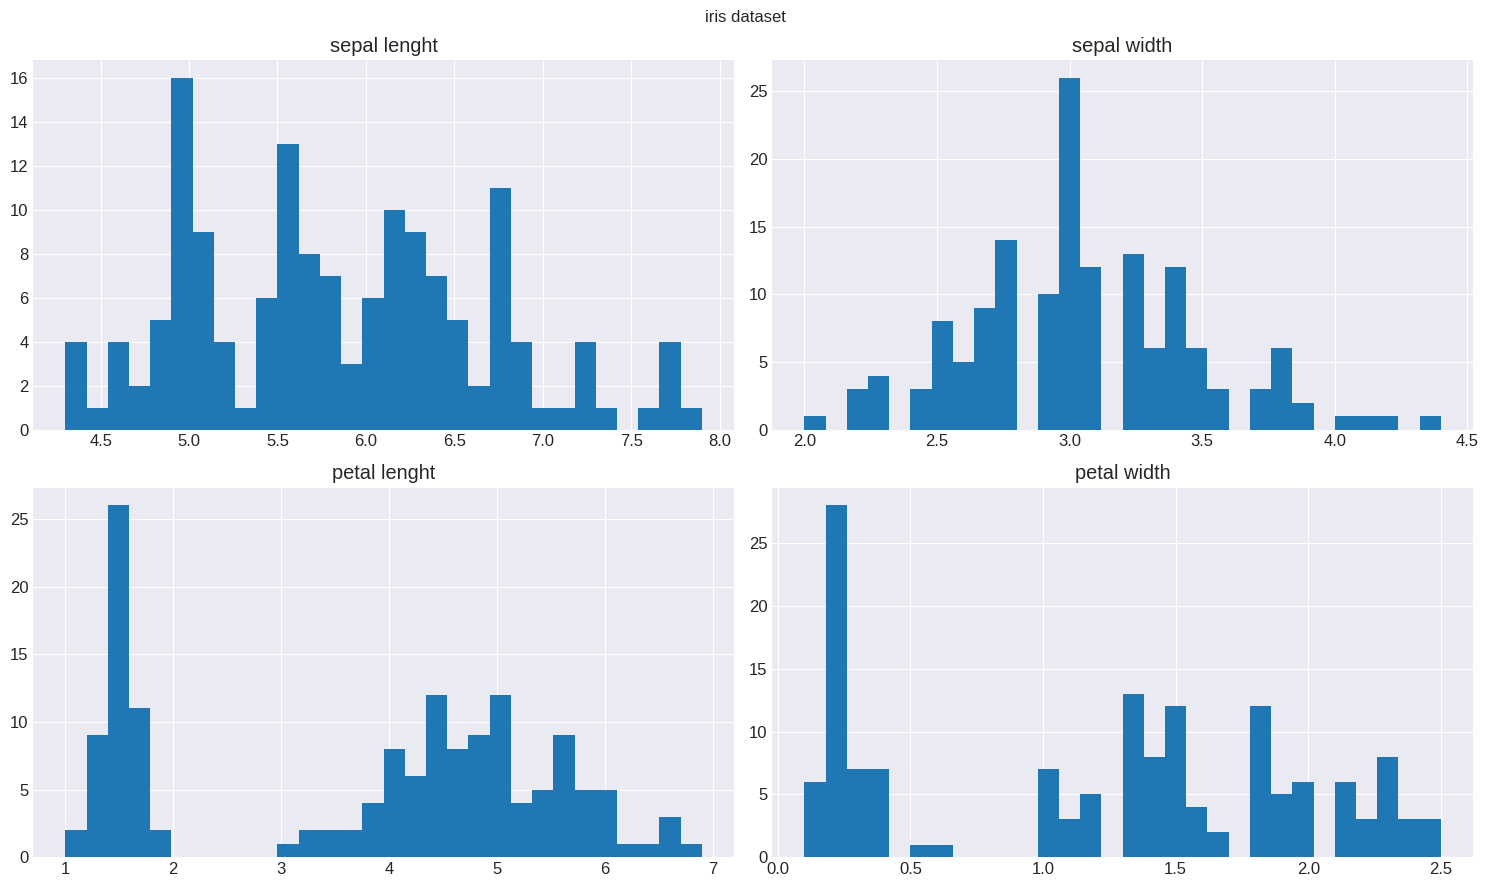

In [40]:

fig = plt.figure( figsize = (15 , 9) )
fig.suptitle('iris dataset')

for count, col in enumerate(iris_df.columns[:-1]):
    
    ax = fig.add_subplot(2,2 ,count+1)
    
    plt.subplots_adjust(wspace=0.1 , hspace=0.1)
    
    n, bins ,patches = ax.hist( iris_df[col] , 30)
    
    ax.set_title('{}'.format(iris_df.columns[count]))
    
    ax.axis('tight')
    
    
plt.tight_layout()
plt.show()
                           
        


In [41]:
##feature extraction

feature_df = iris_df.drop('target' , axis=1)
labels_df = iris_df['target']

feature_df.head()
    


,sepal lenght,sepal width,petal lenght,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
labels_df.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [43]:

def fn_calc_mu_std(df):
    '''
    Args:
     df:dataframe
    
    '''
    mu = {}
    std_dev = {}
    min_val = {}
    max_val = {}


    for c in df.columns:
        mu[c] = df[c].mean()
        std_dev[c] = df[c].std()
        min_val[c] = df[c].min()
        max_val[c] = df[c].max()
        
    return  mu ,std_dev ,min_val , max_val      


In [44]:
target_names = ['setosa' , 'versicolor' , 'vrginica']

formatter = plt.FuncFormatter(lambda i  , *args: target_names[int(i)])

props = dict(boxstyle='round' , facecolor = 'aqua' , alpha=0.5)

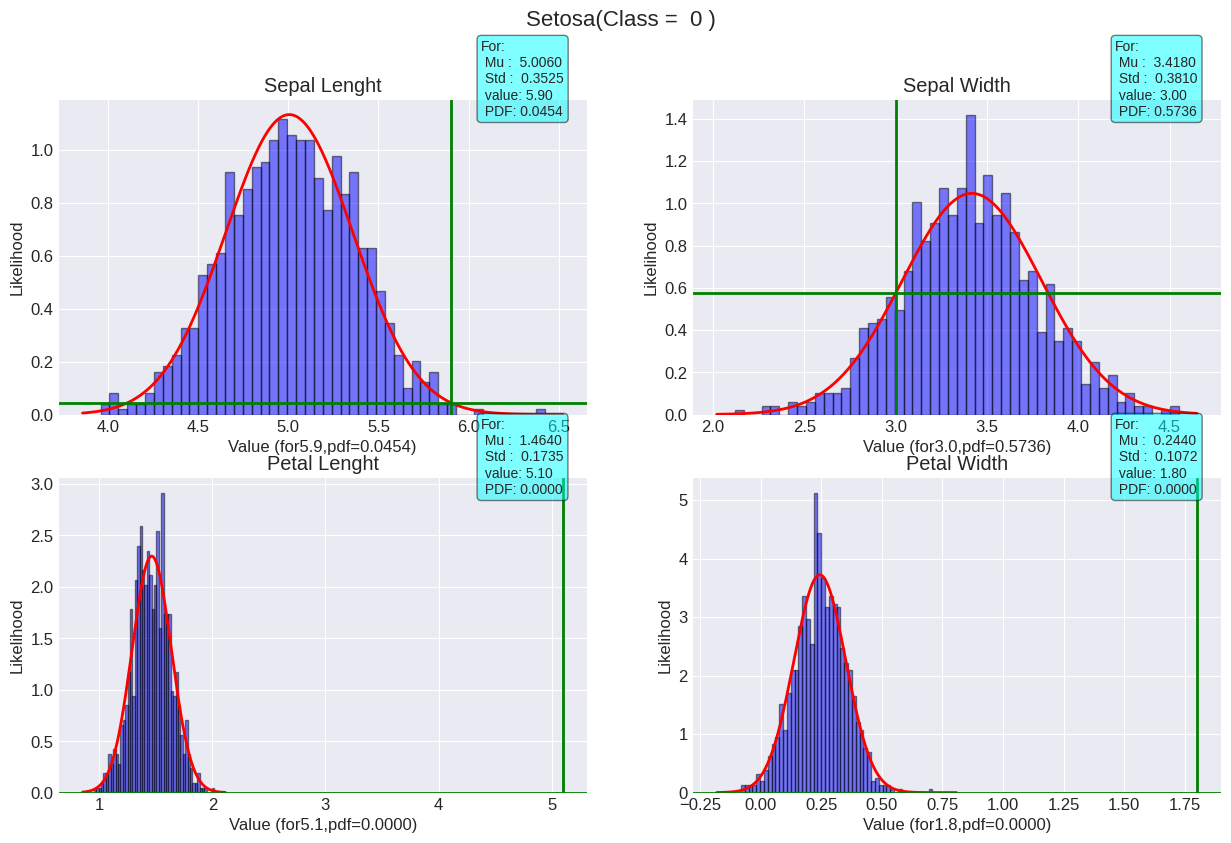

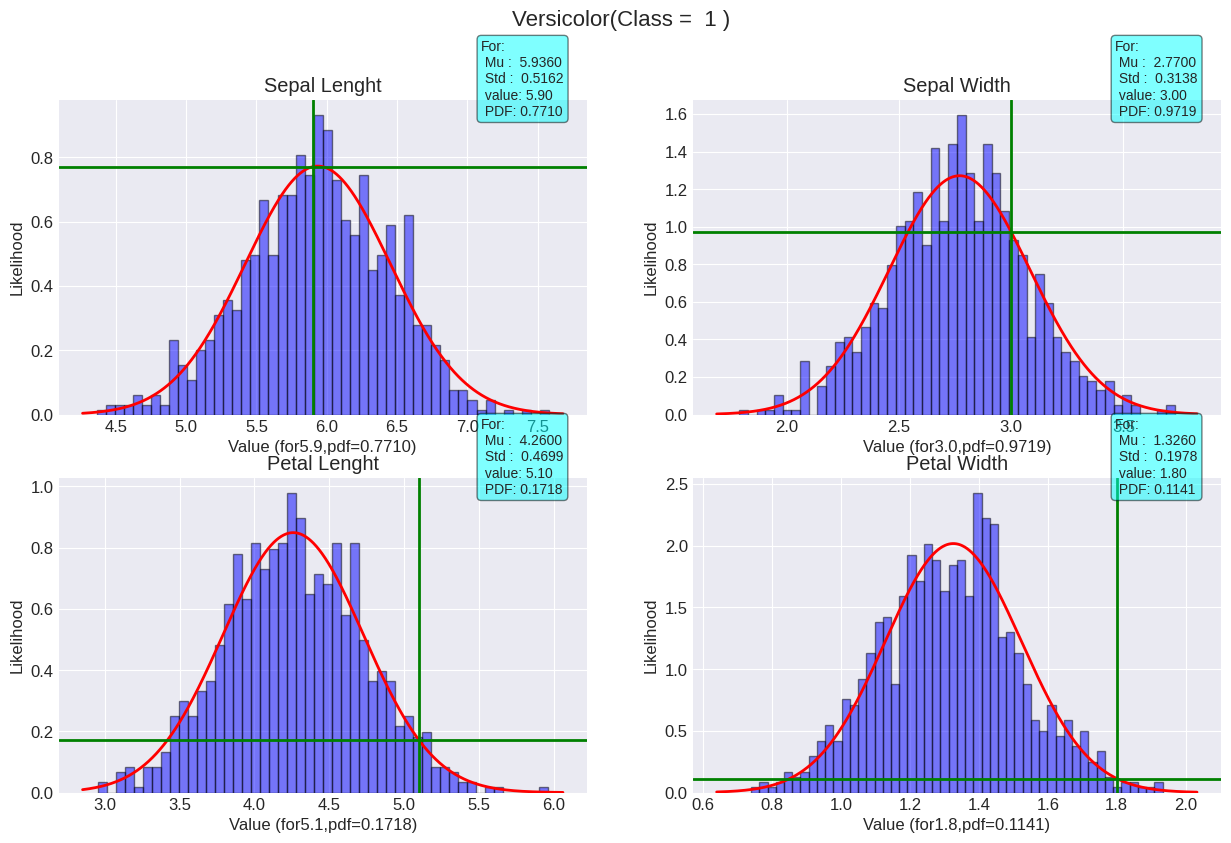

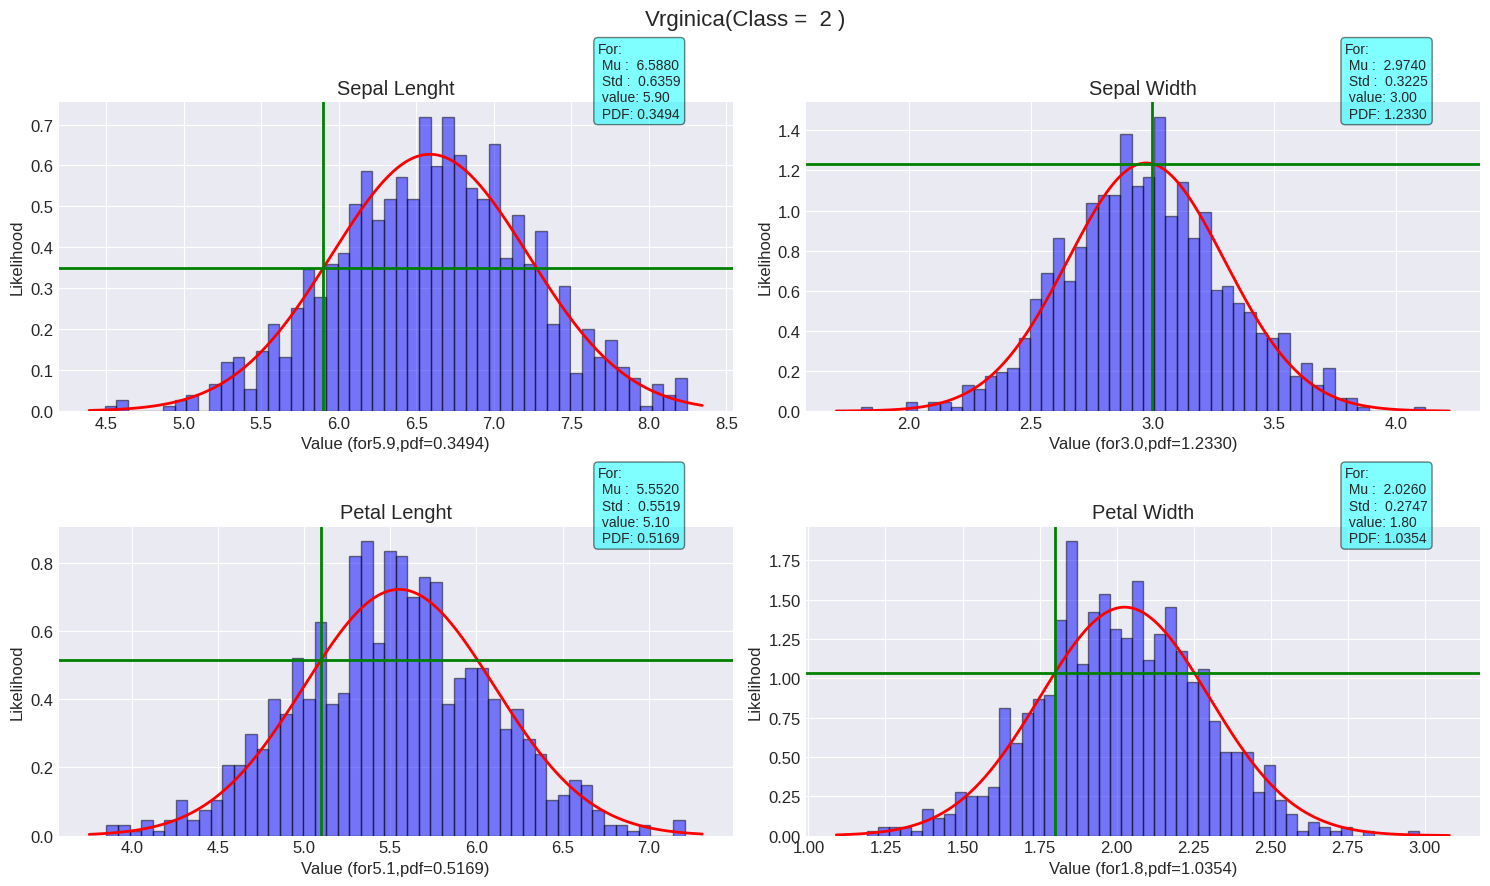

In [45]:
pdf_labels = {}

for lbl in iris_df['target'].unique():
    lable = target_names[lbl]
    tmp_df = iris_df[iris_df['target'] == lbl]
    tmp_df = tmp_df.drop('target' , axis = 1)
    mu ,  std_dev , min_val , max_val =  fn_calc_mu_std(tmp_df)
    
    fig , axes = plt.subplots(2,2,figsize = (15 , 9))
    fig.suptitle( f'{ lable.title() }(Class = {lbl:2d} )' , fontsize=(16))
    
    
    nSample = 1000
    pdf_col = {}
    
    
    for count, col in enumerate(tmp_df.columns):
        
        ax = axes.ravel()[count]
        meanVal = mu[col]
        stdDev = std_dev[col]
        minVal = min_val[col]
        maxVal = max_val[col]
        data = np.random.normal(meanVal , stdDev , nSample)
        
        
        ax.hist(data , bins=50 , density=True , alpha=0.5 , color='b' , edgecolor='k')
        x = np.linspace(data.min()- 0.1 , data.max() + 0.1 , nSample)
        pdf = norm.pdf(x , meanVal , stdDev)
        
        ax.plot(x,pdf,'r-',lw=2)
        
        val=feature_df.iloc[-1][col]
        pdf_val = norm.pdf(val,meanVal,stdDev)
        pdf_col[col]=pdf_val
        
        ax.axvline(x=val,color='g' , linewidth=2)
        ax.axhline(y=pdf_val,color='g' , linewidth=2)
        
        fmtStr="For:\n Mu : {:7.4f}\n Std : {:7.4f}\n value:{:5.2f}\n PDF:{:7.4f}"
        txtStr=fmtStr.format(meanVal,stdDev,val,pdf_val)
        ax.text(0.8,0.95,txtStr,transform=ax.transAxes,fontsize=10,bbox=props)
    
        ax.set_title(col.title())
        ax.set_xlabel(f"Value (for{val},pdf={pdf_val:.4f})")
        ax.set_ylabel("Likelihood") 
        
        pdf_labels[lable]=pdf_col
plt.tight_layout()
plt.savefig(os.path.join(f'gaussion_iris_{lable}.png'))
plt.show()      
    
    
     
     

In [46]:

y_pread=[]

for k , val_lbl in pdf_labels.items():
    prob = 1
    for k_col , val_col in val_lbl.items():
        prob *=val_col  
    y_pread.append(prob)
    
    print(f'for label : {k:11s}; Likelihood : {prob: 0.4f}')
    
    
y_pread = [v/sum(y_pread) for v in y_pread]
print(f'Probablitys : {y_pread}')

    

for label : setosa     ; Likelihood :  0.0000
for label : versicolor ; Likelihood :  0.0147
for label : vrginica   ; Likelihood :  0.2306
Probablitys : [7.265276020022551e-142, 0.05987903023763665, 0.9401209697623634]


In [47]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

clf = GaussianNB()

clf.fit(feature_df, labels_df)

y_pread  = clf.predict(feature_df)

In [48]:
y_pread

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
clf.fit
labels = labels_df.to_numpy()

xplot = iris_df.keys()[0]

yplot = iris_df.keys()[1]

x_err = iris_df[xplot][(labels != y_pread)]
y_err = iris_df[yplot][(labels != y_pread)]

In [52]:
plt.scatter?


Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    Th

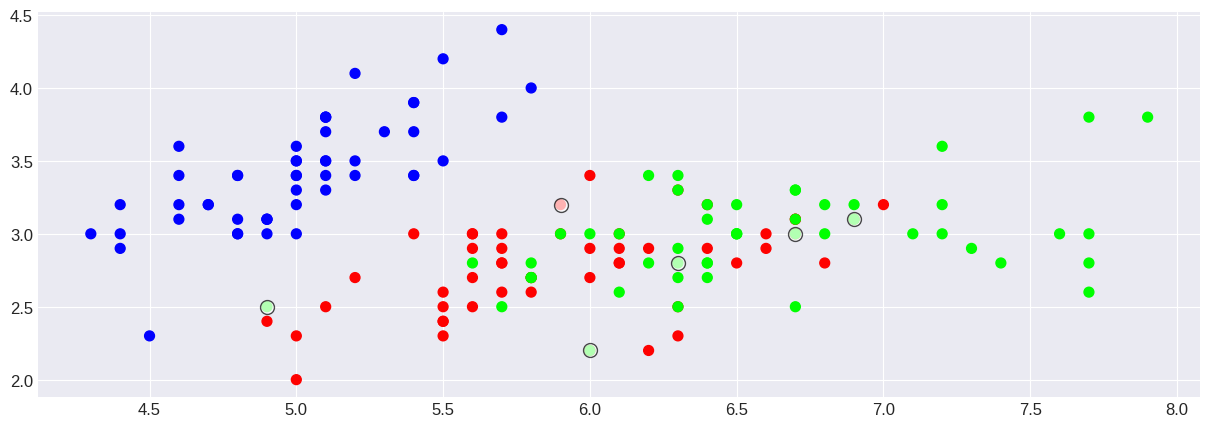

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(iris_df[xplot], iris_df[yplot],s = 50, c = iris_df['target'], cmap=plt.cm.brg);
plt.scatter(x_err, y_err, color = "w", label="mismatch", s = 100, alpha= 0.7, edgecolors='black')

In [54]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

clf = MultinomialNB()

clf.fit(feature_df, labels_df)

y_pread  = clf.predict(feature_df)

In [55]:
y_pread

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
clf.fit
labels = labels_df.to_numpy()

xplot = iris_df.keys()[0]

yplot = iris_df.keys()[1]

x_err = iris_df[xplot][(labels != y_pread)]
y_err = iris_df[yplot][(labels != y_pread)]

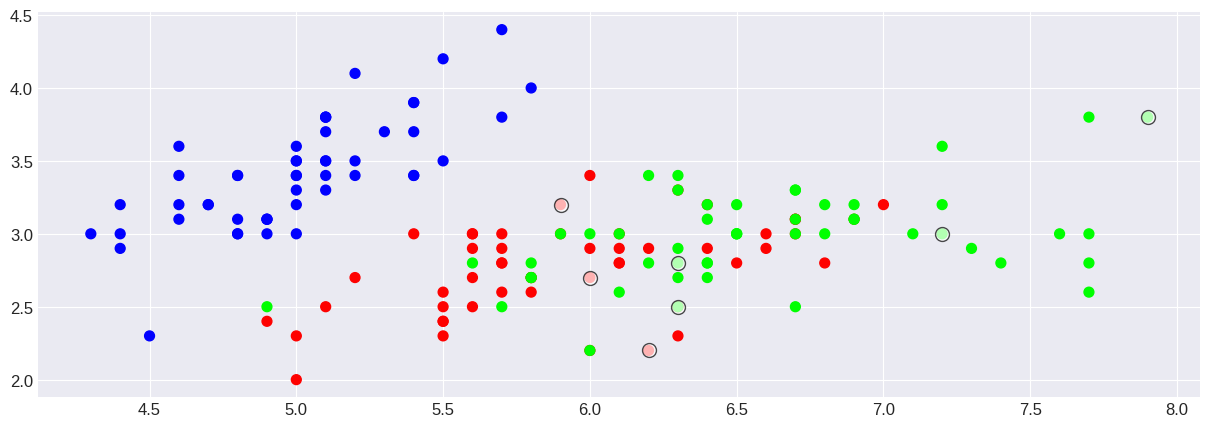

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(iris_df[xplot], iris_df[yplot],s = 50, c = iris_df['target'], cmap=plt.cm.brg);
plt.scatter(x_err, y_err, color = "w", label="mismatch", s = 100, alpha= 0.7, edgecolors='black')

In [58]:
accuracy_score(y_pread, labels)

0.9533333333333334

In [59]:
from sklearn import datasets

In [60]:
N_SAMPLES = 1000
NOISE = 0.0

In [63]:
X, y = datasets.make_moons(n_samples=N_SAMPLES,
                           shuffle=True,
                           noise=NOISE,
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.67874295,  0.73437593],
        [-0.61146339,  0.79127273],
        [ 1.99427795,  0.39317601],
        [-0.98953437,  0.14429736],
        [-0.99873189,  0.05034492]]),
 array([0, 0, 1, 0, 0]))

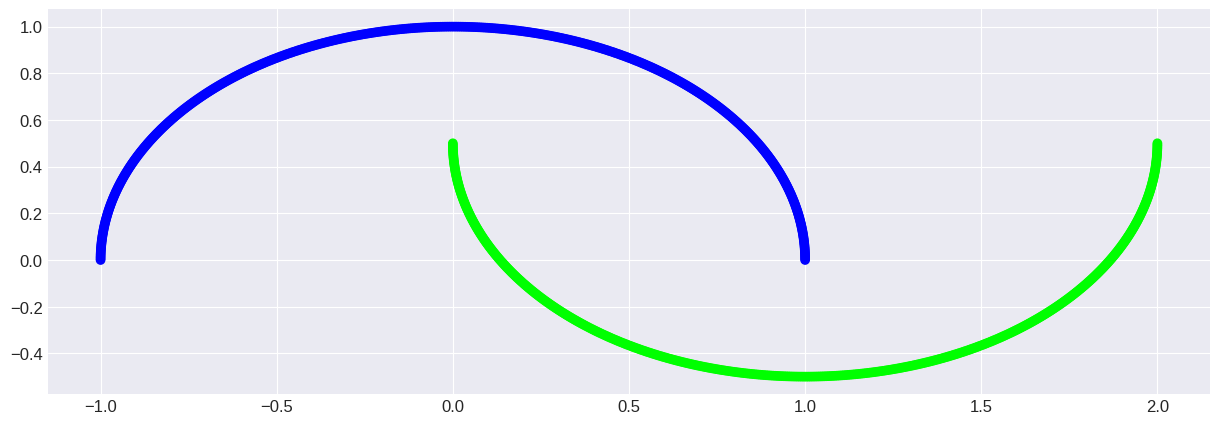

In [64]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap = plt.cm.brg);

In [65]:
inpDir = os.path.join('Input')
data_df = pd.read_csv( 'boston_house_price.csv')
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


IndexError: index 7 is out of bounds for axis 0 with size 7

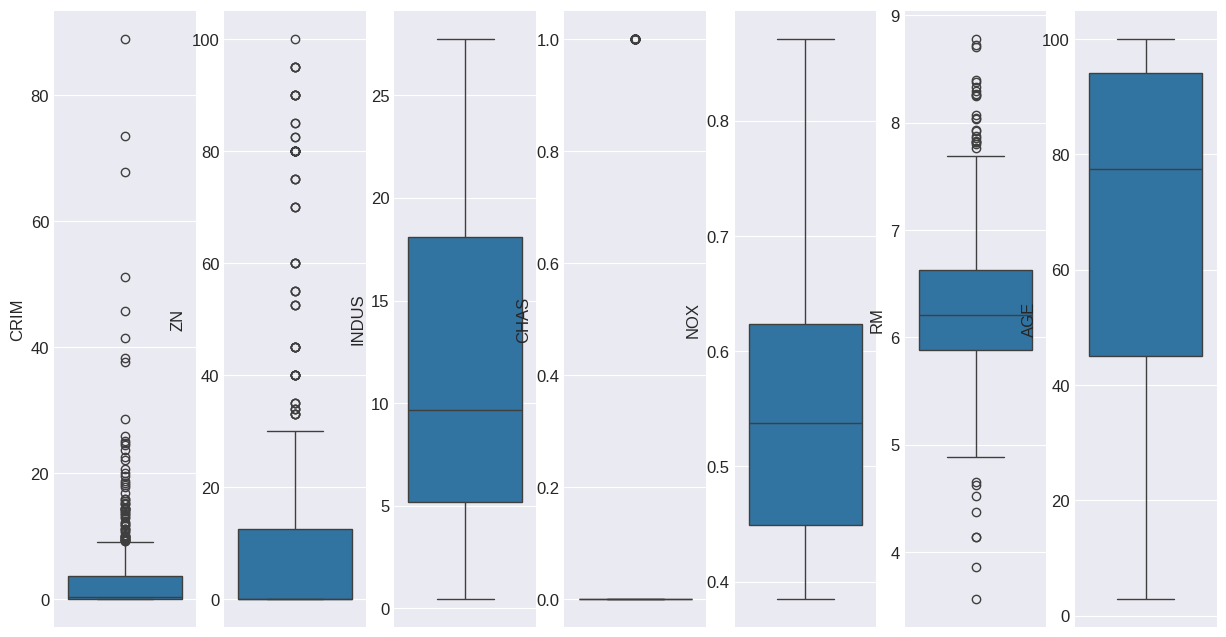

In [67]:
fig, axes = plt.subplots(ncols=7, figsize=(15, 8))
axes = axes.flatten()

for count, col in enumerate(data_df.columns):
    ax = axes[count]
    sns.boxplot(y=col, data=data_df, ax=ax)

plt.tight_layout();